# SNSim Examples


In [1]:
import sys
sys.path.append('../')
import snsim
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time

## Generate SN Ia parameters

### Create a fake survey

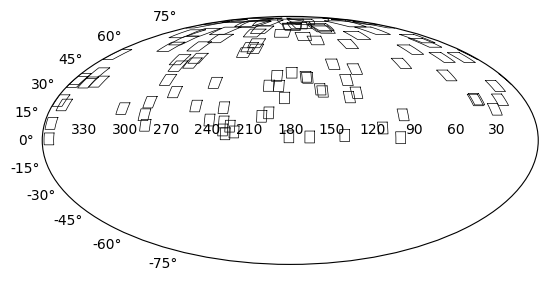

In [2]:
_d2r = np.pi / 180

# Field size in deg
survey_size = [7., 7.]

# Number of fields to generate
n_fields = 100

# ra, dec uniform
ra = np.random.uniform(survey_size[0] / 2, 380 - survey_size[0] / 2, size=n_fields)
dec =  np.random.uniform(0, 90 - survey_size[1] / 2, size=n_fields)

fields_dic = {i: {'ra': r * _d2r, 'dec': d * _d2r} for i, (r, d) in enumerate(zip(ra, dec))}

fields = snsim.survey_host.SurveyFields(fields_dic,
                                        survey_size[0], 
                                        survey_size[1],
                                        'rectangle')

fields.show_fields()

### SN generator parameters

In [3]:
randseed = 1234
n_obj = 5000
z_range = [0.02, 0.2]

time_range = ["2021-08-03", "2022-08-03"]

snia_gen = {'n_sn': 10,
            'M0': 'jla',
            'mag_sct': 0.12,
            'sct_model': 'G10',
            'rate': 'ptf19',
            'model_config': {'model_name': 'salt3',
                             'alpha': 0.14,
                             'beta': 2.9,
                             'dist_x1': 'N21',
                             'dist_c': [-0.055, 0.023, 0.150]}}

cosmology = {'name':'planck18'}

cmb = {'v_cmb': 0,
       'l_cmb':0,
       'b_cmb':0}

vpec_dist = {'mean_vpec':0,
             'sig_vpec':300}

mw_dust = {'model': 'CCM89',}



In [4]:
# Take the SN Ia parameters generator class
gen_class = getattr(snsim.generators, snsim.generators.__GEN_DIC__['snia_gen'])

# Give the input configuration
SNgenerator = gen_class(snia_gen,
                        cmb,
                        snsim.utils.set_cosmo(cosmology),
                        vpec_dist=vpec_dist,
                        mw_dust=mw_dust,
                        survey_footprint=fields.footprint)

# Compute redshift distribution
SNgenerator.compute_zcdf(z_range)

# Set mint time and max time
SNgenerator.time_range = (Time(time_range[0]).mjd, Time(time_range[1]).mjd)


# Gen basic parameters
params = SNgenerator.gen_astrobj_par(n_obj, randseed)


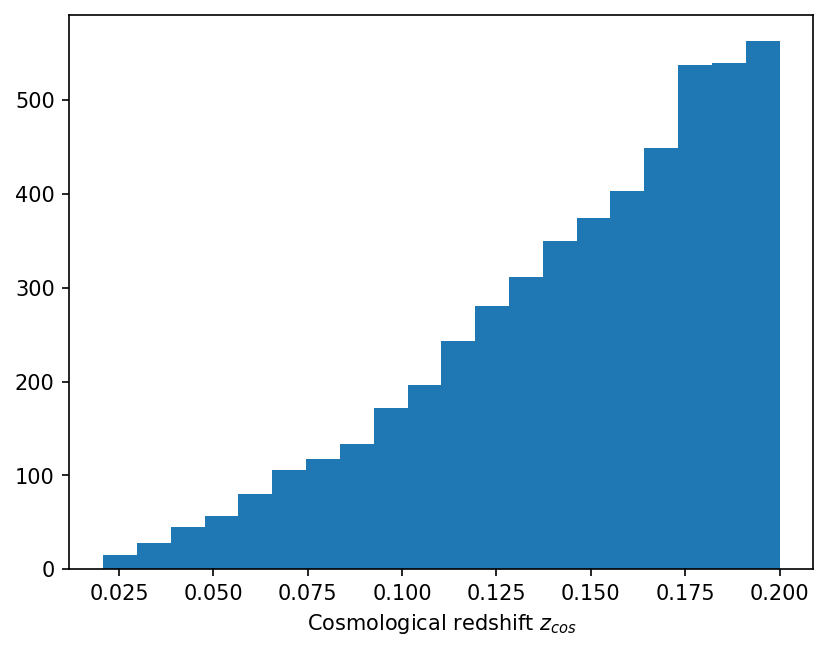

In [5]:
# Plot redshift hist (scale with cosmological volume)
plt.figure(dpi=150)
plt.hist(params['zcos'], bins=20)
plt.xlabel('Cosmological redshift $z_{cos}$')
plt.show()

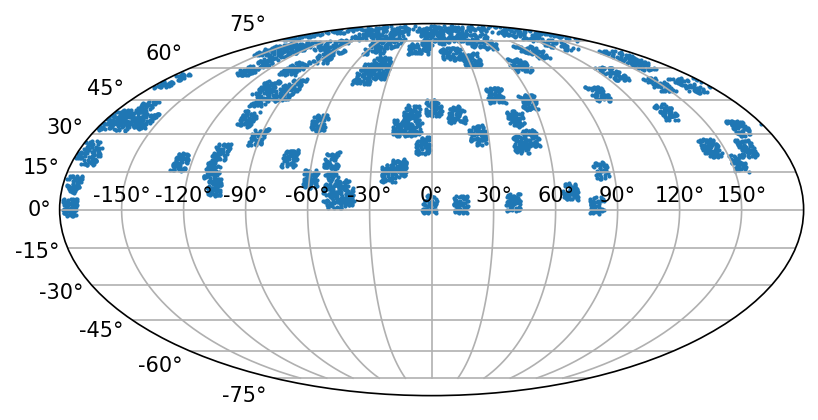

In [6]:
# Plot SN positions
plt.figure(dpi=150)
plt.subplot(projection='mollweide')
plt.scatter(params['ra'] - np.pi, params['dec'], s=1)
plt.grid()
plt.show()

In [7]:
# Generate SN obj
SNs = SNgenerator(n_obj, randseed, astrobj_par=params)

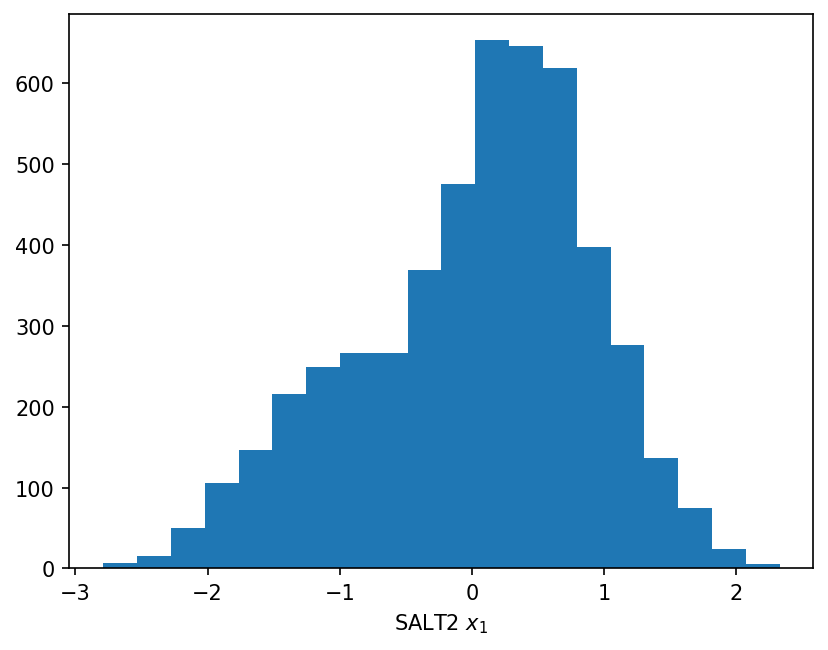

In [8]:
# Plot x1 dist
plt.figure(dpi=150)
plt.hist([SN.sim_x1 for SN in SNs], bins=20)
plt.xlabel('SALT2 $x_1$')
plt.show()

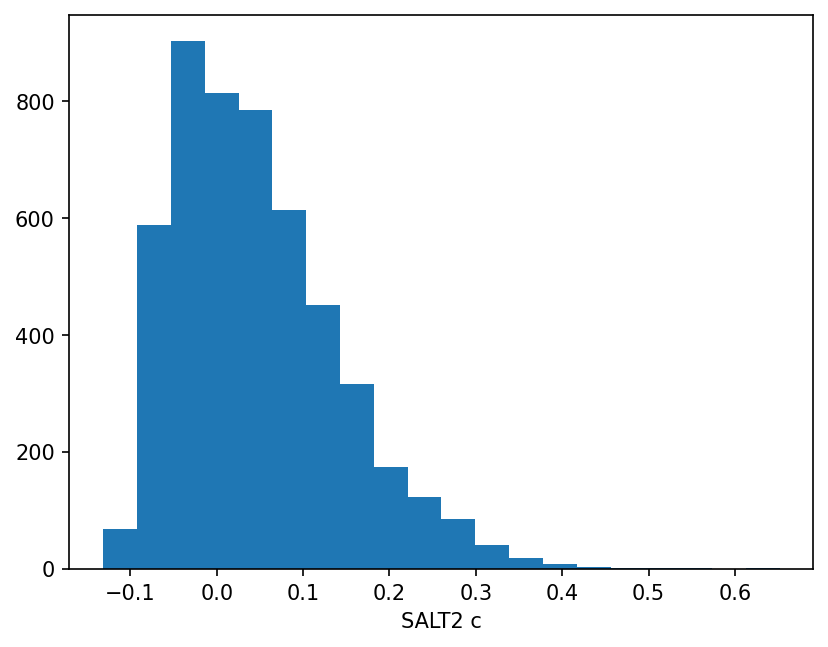

In [9]:
# Plot c dist
plt.figure(dpi=150)
plt.hist([SN.sim_c for SN in SNs], bins=20)
plt.xlabel('SALT2 c')
plt.show()

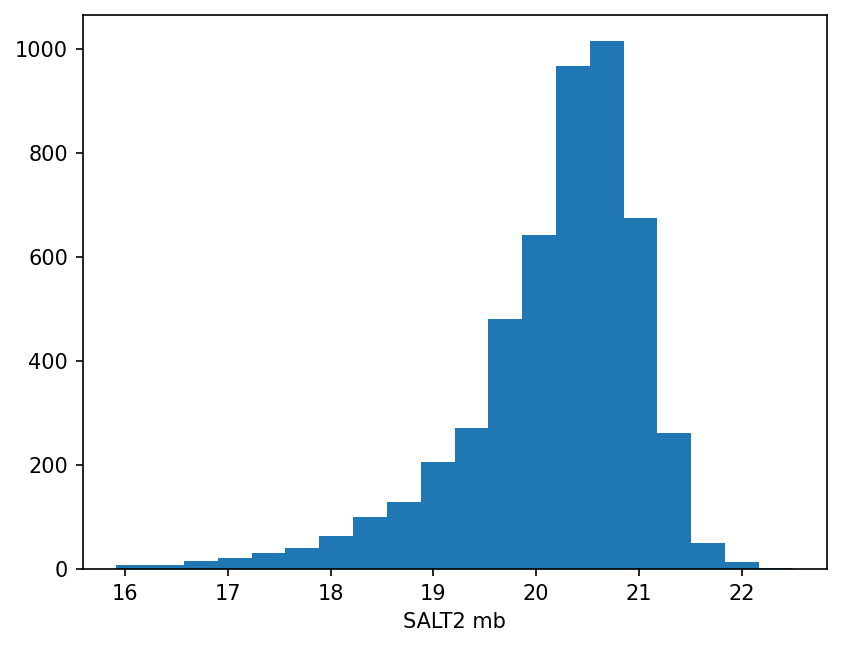

In [10]:
# Plot mb dist
plt.figure(dpi=150)
plt.hist([SN.sim_mb for SN in SNs], bins=20)
plt.xlabel('SALT2 mb')
plt.show()

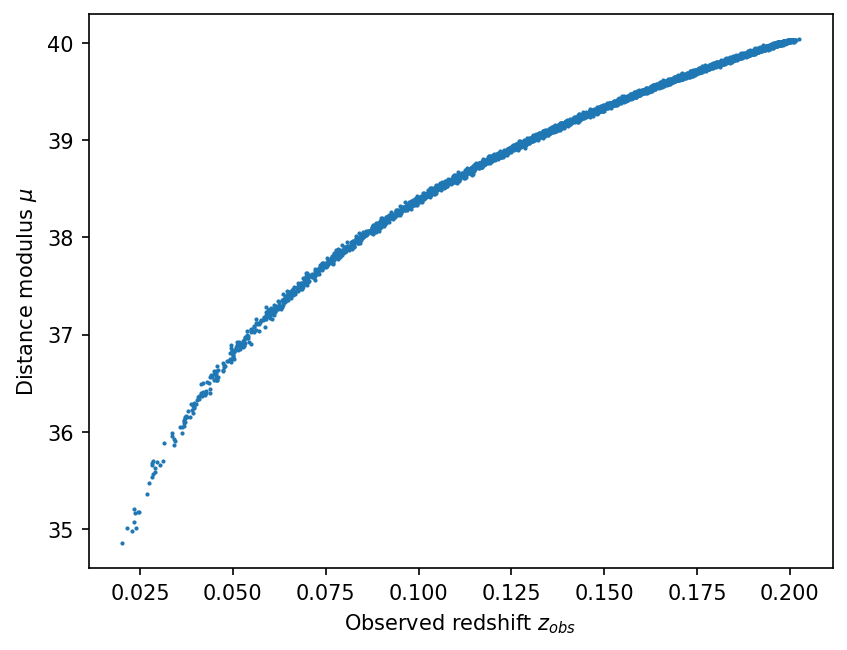

In [11]:
# Plot HD (with peculiar velocities effect on z)
plt.figure(dpi=150)
plt.scatter([SN.zobs for SN in SNs], [SN.sim_mu for SN in SNs], s=1)
plt.xlabel('Observed redshift $z_{obs}$')
plt.ylabel('Distance modulus $\mu$')
plt.show()